In [1]:
#@title # Python Setup { display-mode: "form" }

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

!pip install exifread &> /dev/null

import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *
print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- How do light rays form an image?
- What are shadows?

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>



# **Light Sources in a scene**

Let's take a look at an image with two lamps on in the scene

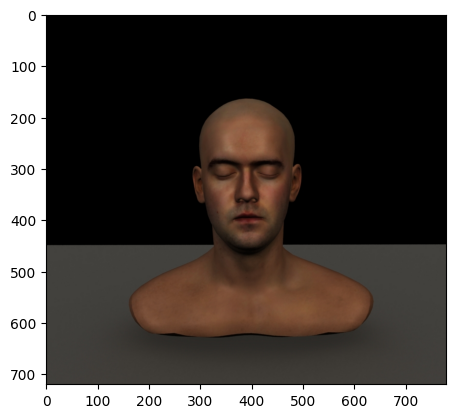

In [2]:
# TODO
# load an image with two lamps on
image = steam.data.headScan()[3][:, 250:-250]
image = image# / image.max()
display_img(image, dpi=100)

Now let's look at two images, one with each lamp on.

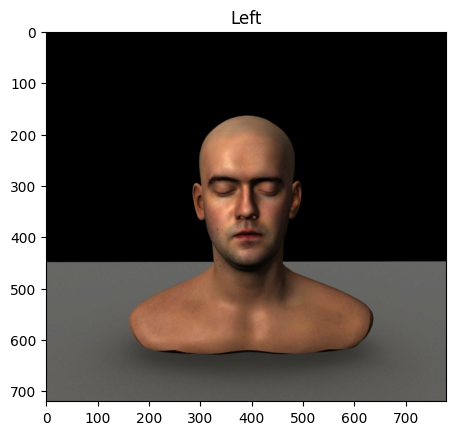

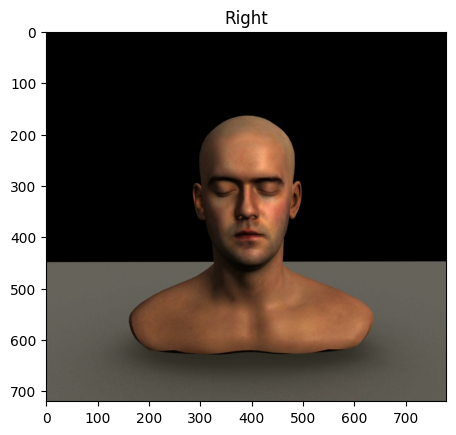

In [3]:
#TODO show images with only one lamp on.
image_left = steam.data.headScan()[1][:, 250:-250]
image_right = steam.data.headScan()[2][:, 250:-250]
display_img(image_left/image_left.max(), title='Left', dpi=100)
display_img(image_right/image_right.max(), title='Right', dpi=100)

Notice how the shadows are different, how the images look different. Now let's add the two images.



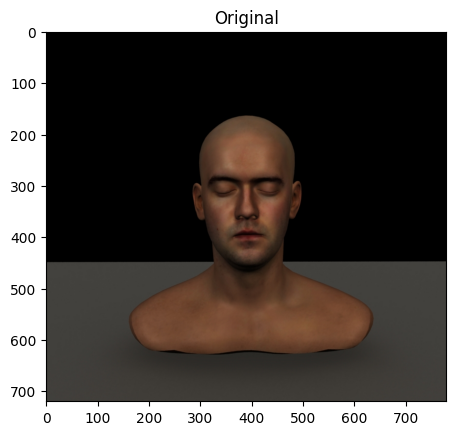

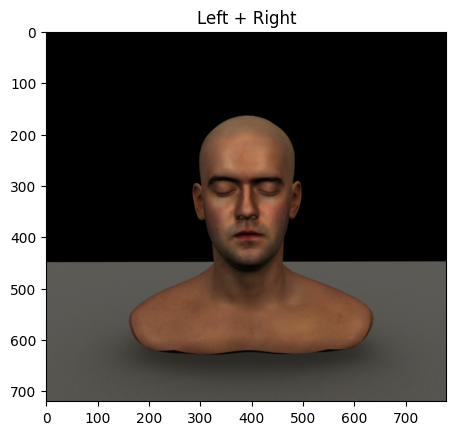

In [4]:
# TODO: Add the two images, and show that the sum of the two images equals the first image
image_add = image_left + image_right
display_img(image, title='Original', dpi=100)
display_img(image_add, title='Left + Right', dpi=100)

###Let's take this one step further: let's adjust the brightness of each lamp and see how it changes the shadows

In [5]:

def lightingExample():
    scans = steam.data.headScan()

    base_scene = scans[0][:, 250:-250, :].astype('float32') / 255
    light_left = scans[1][:, 250:-250, :].astype('float32') / 255
    light_right = scans[2][:, 250:-250, :].astype('float32') / 255

    sliderLeft = widgets.FloatSlider(description='Left Light', value=0, min=0, max=2.0, step=0.01, orientation='vertical')
    sliderRight = widgets.FloatSlider(description='Right Light', value=0, min=0, max=2.0, step=0.01, orientation='vertical')
    buttonLeft = widgets.Button(description='Left Toggle')
    buttonRight = widgets.Button(description='Right Toggle')
    ui_left = VBox([sliderLeft, buttonLeft], layout=Layout(justify='center'))
    ui_right = VBox([sliderRight, buttonRight])


    def _update_display(L, R):
        tmp_img = base_scene + (L * light_left) + (R * light_right)
        utils.display_img(np.clip(tmp_img,0,1), title='', dpi=100)

    def _left_clicked(b):
        if sliderLeft.value == 0:
            sliderLeft.value = 1.0
        else:
            sliderLeft.value = 0

    def _right_clicked(b):
        if sliderRight.value == 0:
            sliderRight.value = 1.0
        else:
            sliderRight.value = 0

    buttonLeft.on_click(_left_clicked)
    buttonRight.on_click(_right_clicked)

    output = widgets.interactive_output(_update_display,
                                {'L': sliderLeft, 'R': sliderRight})
    final_widget = HBox([ui_left, output, ui_right])
    display(final_widget)

lightingExample()



This phenomena is based on light rays traveling in the scene. They determine how things appear to us. One of the main effects is shadows.